In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from tabulate import tabulate


#%pip install opencv-python # Required to import cv2 !!!
import cv2

from IPython.display import display, Latex, Math

import os
import time

plt.rcParams['figure.dpi'] = 250

# Task 1

In [4]:
A_1 = np.array([
    [1, 0],
    [0, 1]
]) 

A_2 = np.array([
    [1, 2],
    [1, 1], 
    [1, 2]
])

A_3 = np.array([
    [2, 1, 1],
    [2, 1, 1], 
    [1, 1, 2]
])

A_4 = np.array([
    [2, 1, 0],
    [1, 2, 3], 
    [0, 3, 3]
])

In [5]:
def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0, store_norms = False):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """

    if seed != 0:
        np.random.seed(seed)
    
    norms = np.zeros(maxiter)

    #Initialize W and H to random numbers between 0 and 1 with the correct shape
    m = np.shape(V)[0]
    n = np.shape(V)[1]
    W_0 = np.random.uniform(0.0, 1.0, m*d).reshape(m,d)
    H_0 = np.random.uniform(0.0, 1.0, d*n).reshape(d,n)

    #Scale the matrixes
    W_0 = np.sqrt(np.mean(V)/d)*W_0
    H_0 = np.sqrt(np.mean(V)/d)*H_0
    
    W_next = np.copy(W_0)
    W_prev = np.copy(W_0)
    H_next = np.copy(H_0)
    H_prev = np.copy(H_0)
    
    for k in range(maxiter):
        #This gives the same result
        #H_temp = np.divide(np.multiply(H_prev,np.dot(W_prev.T,V)),np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        #W_temp = np.divide(np.multiply(W_prev,np.dot(V,H_next.T)),np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)

        H_next = (H_prev * np.dot(W_prev.T,V)) / (np.linalg.multi_dot([W_prev.T,W_prev,H_prev])+delta)
        W_next = (W_prev * np.dot(V,H_next.T)) / (np.linalg.multi_dot([W_prev,H_next,H_next.T])+delta)
        H_prev = np.copy(H_next)
        W_prev = np.copy(W_next)
        norms[k] = np.linalg.norm(V- np.dot(W_next, H_next), 'fro')

    if store_norms == False:
        return W_next, H_next
    else:
        return W_next, H_next, norms

In [34]:
def pretty_print(V, d,V_title, delta = 1e-9, maxiter = 1000, seed = 0):
    '''
    Calculates the NMF and prints information about a matrix in a nice format.

    input:
    V: (m,n) input array
    d: integer, Number of components we want to decompose V into
    delta, float, small number for safe division
    maxiter: integer, maximum number of iterations
    seed: integer, random seed

    output: none
    '''
    W, H = NMF(V, d, delta = delta, maxiter = maxiter, seed = seed)
    print(f"Matrix {V_title}, d =  {str(d)}" )
    data = [np.array(["W","H","WH","Norm","W.T A / W.T W H"]),
    [
    np.round(W,3),
    np.round(H,3),
    np.round(np.dot(W,H),3),
    np.linalg.norm(V- np.dot(W,H), 'fro'),
    np.dot(W.T,V) / (np.linalg.multi_dot([W.T,W,H]))
    ]
    ]

    print(tabulate(data, headers='firstrow', tablefmt='fancy_grid'))



## 1d) 

In [37]:
def test_1d():
    pretty_print(A_1,1,"A_1",delta = 1e-9, maxiter = 1000, seed = 0)
    pretty_print(A_1,1,"A_1 new seed",delta = 1e-9, maxiter = 1000, seed = 0)
    pretty_print(A_2,1,"A_2",delta = 1e-9, maxiter = 1000, seed = 0)
    pretty_print(A_2,1,"A_2 new seed",delta = 1e-9, maxiter = 1000, seed = 0)
    
    
test_1d()

Matrix A_1, d =  1
╒═══════════╤═════════════════╤═════════════════╤════════╤═══════════════════════════╕
│ W         │ H               │ WH              │   Norm │ W.T A / W.T W H           │
╞═══════════╪═════════════════╪═════════════════╪════════╪═══════════════════════════╡
│ [[0.008]  │ [[0.087 3.283]] │ [[0.001 0.026]  │      1 │ [[0.99999999 1.        ]] │
│  [0.304]] │                 │  [0.026 0.999]] │        │                           │
╘═══════════╧═════════════════╧═════════════════╧════════╧═══════════════════════════╛
Matrix A_1 new seed, d =  1
╒═══════════╤═════════════════╤═════════════════╤════════╤═══════════════════╕
│ W         │ H               │ WH              │   Norm │ W.T A / W.T W H   │
╞═══════════╪═════════════════╪═════════════════╪════════╪═══════════════════╡
│ [[0.338]  │ [[1.259 1.462]] │ [[0.426 0.494]  │      1 │ [[1. 1.]]         │
│  [0.393]] │                 │  [0.494 0.574]] │        │                   │
╘═══════════╧═════════════════╧═════

## 1e

In [39]:
def test_1e():
    pretty_print(A_1,2,"A_1",delta = 1e-9, maxiter = 1000, seed = 9)
    pretty_print(A_2,2,"A_2",delta = 1e-9, maxiter = 1000, seed = 9)

test_1e()

Matrix A_1, d =  2
╒═════════════════╤═════════════════╤═══════════╤═════════════╤═══════════════════╕
│ W               │ H               │ WH        │        Norm │ W.T A / W.T W H   │
╞═════════════════╪═════════════════╪═══════════╪═════════════╪═══════════════════╡
│ [[0.    0.28 ]  │ [[0.    3.187]  │ [[1. 0.]  │ 4.20688e-10 │ [[nan  1.]        │
│  [0.314 0.   ]] │  [3.568 0.   ]] │  [0. 1.]] │             │  [ 1. nan]]       │
╘═════════════════╧═════════════════╧═══════════╧═════════════╧═══════════════════╛
Matrix A_2, d =  2
╒═════════════════╤═════════════════╤═══════════╤═════════════╤═══════════════════╕
│ W               │ H               │ WH        │        Norm │ W.T A / W.T W H   │
╞═════════════════╪═════════════════╪═══════════╪═════════════╪═══════════════════╡
│ [[0.045 0.396]  │ [[2.277 1.938]  │ [[1. 2.]  │ 2.04476e-06 │ [[1. 1.]          │
│  [0.388 0.051]  │  [2.267 4.834]] │  [1. 1.]  │             │  [1. 1.]]         │
│  [0.045 0.396]] │                 │ 

/var/folders/_k/ftngv5t159n1p3wmrs7nk3nc0000gn/T/ipykernel_6091/2219552368.py:22: RuntimeWarning: invalid value encountered in true_divide
  np.dot(W.T,V) / (np.linalg.multi_dot([W.T,W,H]))


## 1f)

In [9]:
def oppg_1f():
    eigenvalues_A3,eigenvectors_A3 = np.linalg.eig(A_3)
    eigenvalues_A4,eigenvectors_A4 = np.linalg.eig(A_4)

    #Preparing to round off a the eigenvalue -4.04414586e-16 to 0 instead of -0. Caused by machine error.
    eigenvalues_A3[2] = np.abs(eigenvalues_A3[2])  

    
    display(Latex(f'The three eigenvalues of $A_{3}$ is {np.round(eigenvalues_A3,4)}.'))
    display(Latex(f'The three eigenvalues of $A_{4}$ is {(np.round(eigenvalues_A4,4))}.'))

oppg_1f()


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

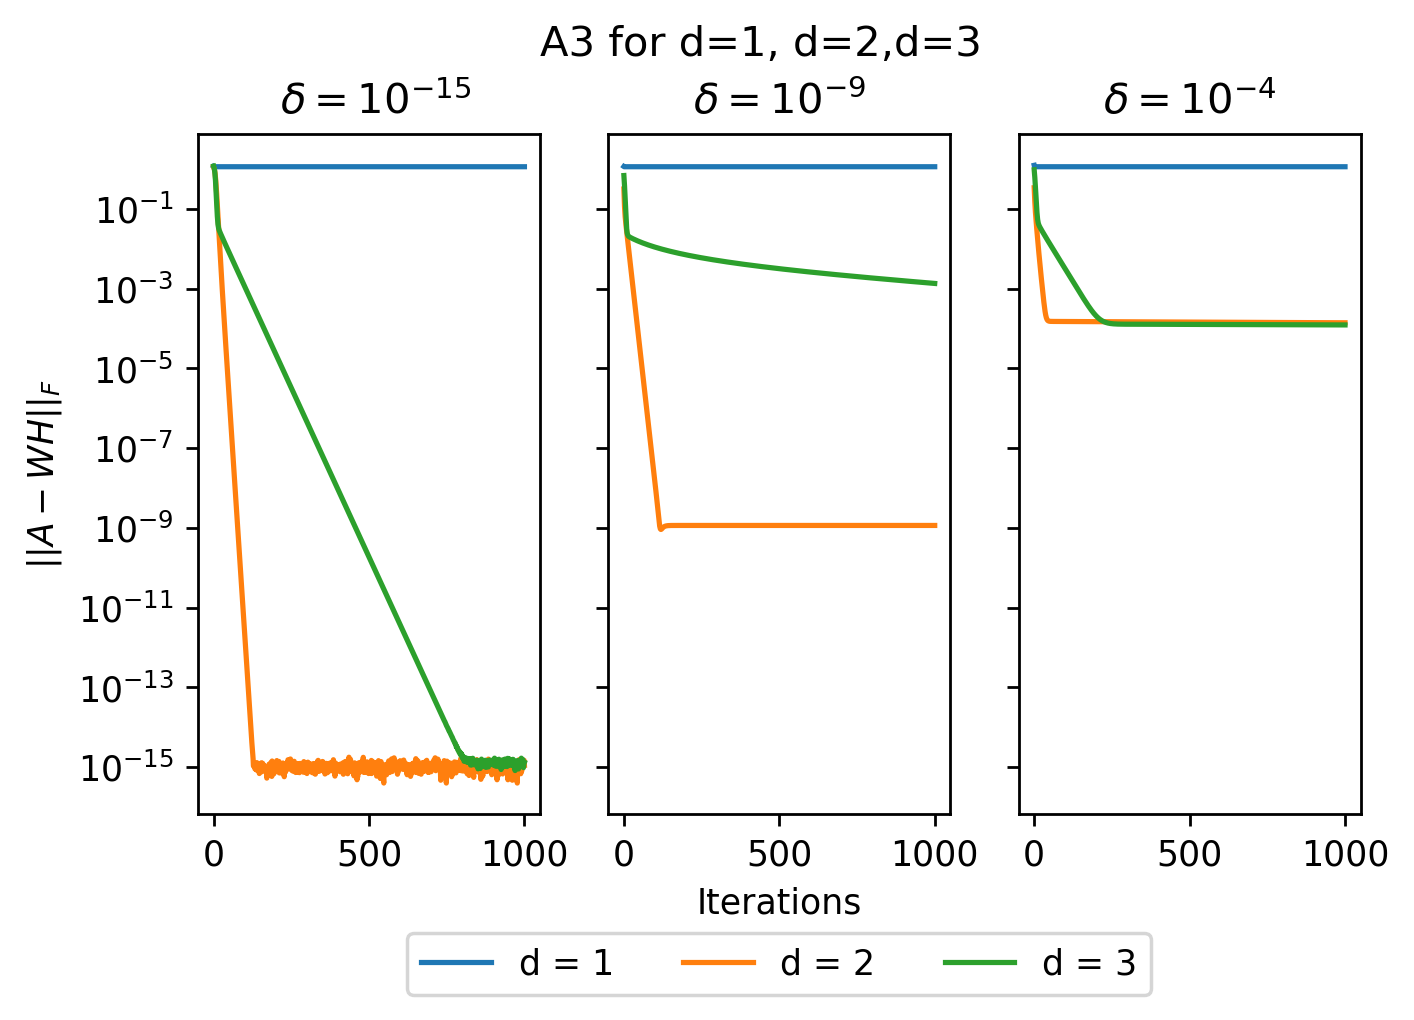

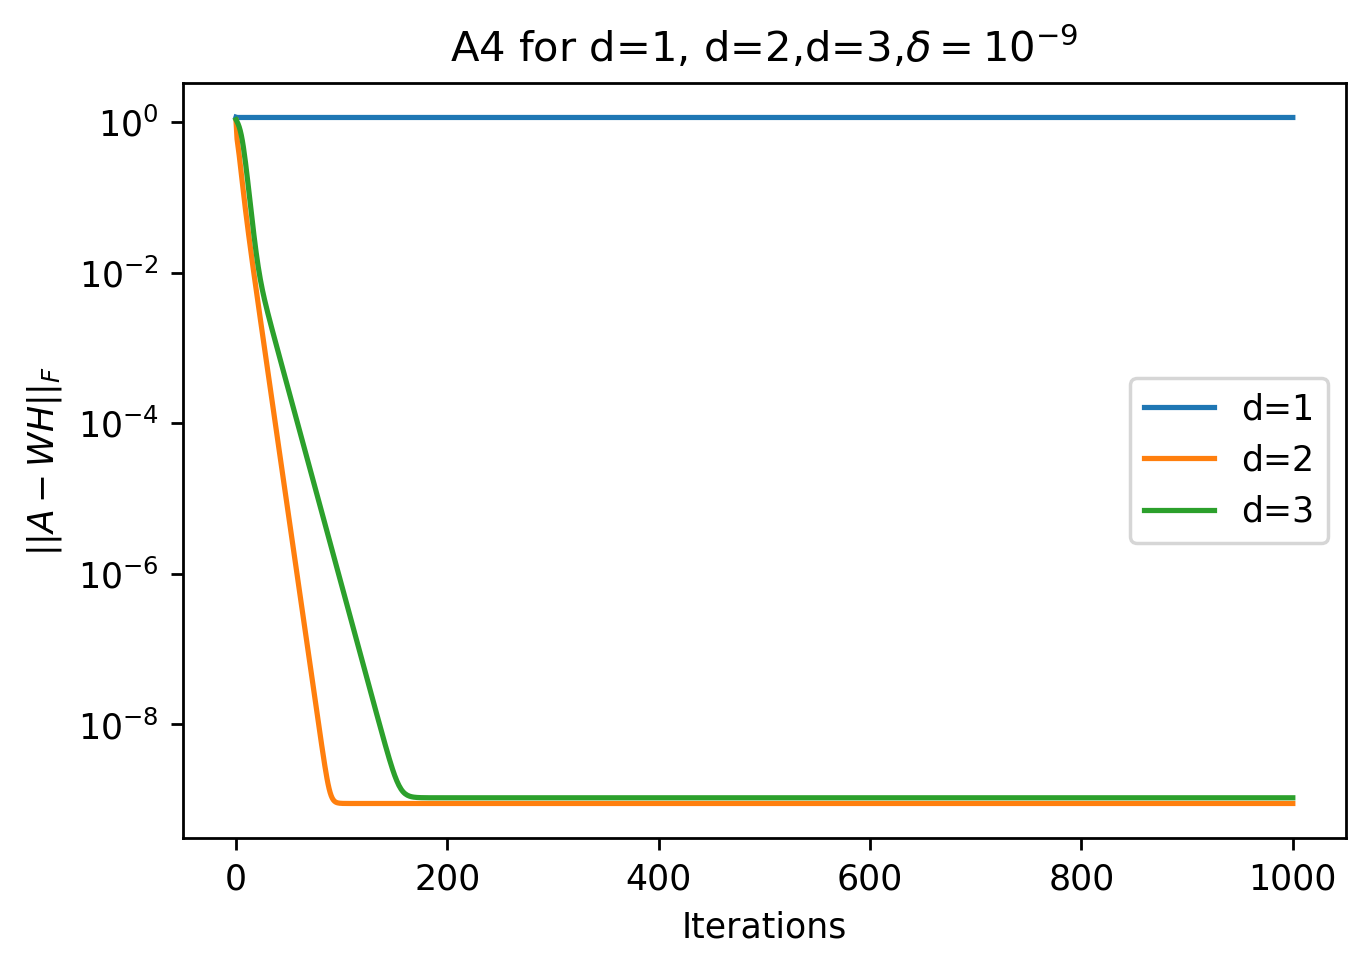

In [120]:
def oppg_1g():

    
    iters = np.linspace(0,1000,1000)
    #A3 data
    W_next_A3_1, H_next_A3_1, norms_A3_1 = NMF(A_3, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2, H_next_A3_2, norms_A3_2 = NMF(A_3, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3, H_next_A3_3, norms_A3_3 = NMF(A_3, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)

    #A4 data, delta = 1e-9
    W_next_A3_1, H_next_A3_1, norms_A4_1 = NMF(A_3, 1, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2, H_next_A3_2, norms_A4_2 = NMF(A_3, 2, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3, H_next_A3_3, norms_A4_3 = NMF(A_3, 3, delta = 1e-9, maxiter = 1000, seed = 0,store_norms=True)

    #A4 data, smaller delta
    W_next_A3_1_small, H_next_A3_1_small, norms_A3_1_small = NMF(A_3, 1, delta = 1e-15, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2_small, H_next_A3_2_small, norms_A3_2_small = NMF(A_3, 2, delta = 1e-15, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3_small, H_next_A3_3_small, norms_A3_3_small = NMF(A_3, 3, delta = 1e-15, maxiter = 1000, seed = 0,store_norms=True)
    
    #A4 data, larger delta
    W_next_A3_1_small, H_next_A3_1_small, norms_A3_1_big = NMF(A_3, 1, delta = 1e-4, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_2_small, H_next_A3_2_small, norms_A3_2_big = NMF(A_3, 2, delta = 1e-4, maxiter = 1000, seed = 0,store_norms=True)
    W_next_A3_3_small, H_next_A3_3_small, norms_A3_3_big = NMF(A_3, 3, delta = 1e-4, maxiter = 1000, seed = 0,store_norms=True)
    

    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, constrained_layout=True, sharey=True,sharex=True)
    fig.suptitle("A3 for d=1, d=2,d=3")
    ax1.plot(iters, norms_A3_1_small,label = "d = 1")
    ax1.plot(iters, norms_A3_2_small,label = "d = 2")
    ax1.plot(iters, norms_A3_3_small,label = "d = 3")
    ax1.set_title(r" $\delta = 10^{-15}$")
    ax1.set_ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    ax1.set_yscale('log')
    
    ax2.plot(iters, norms_A3_1,label = "d = 1")
    ax2.plot(iters, norms_A3_2,label = "d = 2")
    ax2.plot(iters, norms_A3_3,label = "d = 3")
    ax2.set_title(r"$\delta = 10^{-9}$")
    ax2.set_xlabel('Iterations')
    ax2.set_yscale('log')

    ax3.plot(iters, norms_A3_1_big,label = "d = 1")
    ax3.plot(iters, norms_A3_2_big,label = "d = 2")
    ax3.plot(iters, norms_A3_3_big,label = "d = 3")
    ax3.set_title(r"$\delta = 10^{-4}$")
    ax3.set_yscale('log')

    #shrink the plot to make place for a legend
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    box = ax3.get_position()
    ax3.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

    # Put a legend below current axis. 
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=False, ncol=5)
    plt.show()
    
    #A4 plotting
    plt.figure(4)
    plt.plot(iters,norms_A4_1,label = "d=1")
    plt.plot(iters,norms_A4_2,label= "d=2")
    plt.plot(iters,norms_A4_3,label = "d=3")
    plt.title(r"A4 for d=1, d=2,d=3,$\delta = 10^{-9}$")
    plt.yscale('log')
    plt.xlabel("Iterations")
    plt.ylabel(r'$\vert\vert{A-WH}\vert\vert_F$')
    plt.legend()

    plt.show()


oppg_1g()


# Task 2

In [11]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

In [12]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams

## 2a

In [13]:
def plot_random_faces():
    # Load all 10000 images
    faces = load_images(10000)

    # Select N random images
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces = faces[:,:,:,choices]

    # Check that the shape is correct
    print(faces.shape)

    # Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
    plotimgs(faces, 8, filename="punks.png")
# plot_random_faces()

## 2b
Jeg har funnet ut at det er raskere å hente bildedata fra en npz fil vs loadimages, så jeg gjør det


In [14]:
def generate_face_data():
    '''
    This funtion loads all images to numpy arrays and saves them to a selection of smaller arrays. This
    is to reduce runtime while testing the upcomming calculations.
    '''
    # Load all 10000 images
    faces = load_images(10000)

    # Select 500 random images
    N = 500
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_500 = faces[:,:,:,choices]
    assert (faces_500.shape == (24, 24, 4, 500))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 100
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_100 = faces[:,:,:,choices]
    assert (faces_100.shape == (24, 24, 4, 100))  # Make sure the dimensions are correct
    
    # Select 100 random images
    N = 4
    choices = np.random.choice(faces.shape[-1],N, replace = False)
    faces_4 = faces[:,:,:,choices]
    assert (faces_4.shape == (24, 24, 4, 4))  # Make sure the dimensions are correct

    
    np.savez(
        'faces',
        faces = faces,
        faces_500 = faces_500,  # 500 faces
        faces_100 = faces_100,  # 100 faces
        faces_4 = faces_4       # 4 faces
    )
generate_face_data()

In [15]:
def find_mean_faces(face_data):
    '''
    Contrary to the name, this function does not actualy find 'mean' faces, but rather the mean value of each pixel
    in the faces dataset.
    Input:
        face_data: string, the face array for which we will calculate the mean
    The output is saved to a file as a 24*24*4 array:
        Filename:   mean_faces.npz
        Arraydata:  face_mean
    '''
    # Start by loading the faces that are to be used
    faces_data = np.load('faces.npz')
    faces = faces_data[face_data]

    ########################################################
    # Create some test-data to verify that the 
    # method works
    # faces[:, :, :, 0] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 1] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 2] = [[[1/4, 0, 0, 1 ]]]   # red red
    # faces[:, :, :, 3] = [[[1/4, 0, 0, 1 ]]]   # nothing

    # Alter face 3
    # faces[6:18, 6:18, :, 3] = [[[0, 1, 0, 1]]]  # green
    # The mean should be yellow

    ########################################################


    # The images are stored on the last index of the faces array
    mean_face = np.mean(faces, axis = 3)
    assert(mean_face.shape == (24, 24, 4)) # assert the correct shape

    np.savez(
        'mean_face.npz',
        mean_face = mean_face
    )
    
    
    # Plotting
    plt.imshow(mean_face[:, :, :])
    plt.axis('off')
    plt.show()

#find_mean_faces('faces')

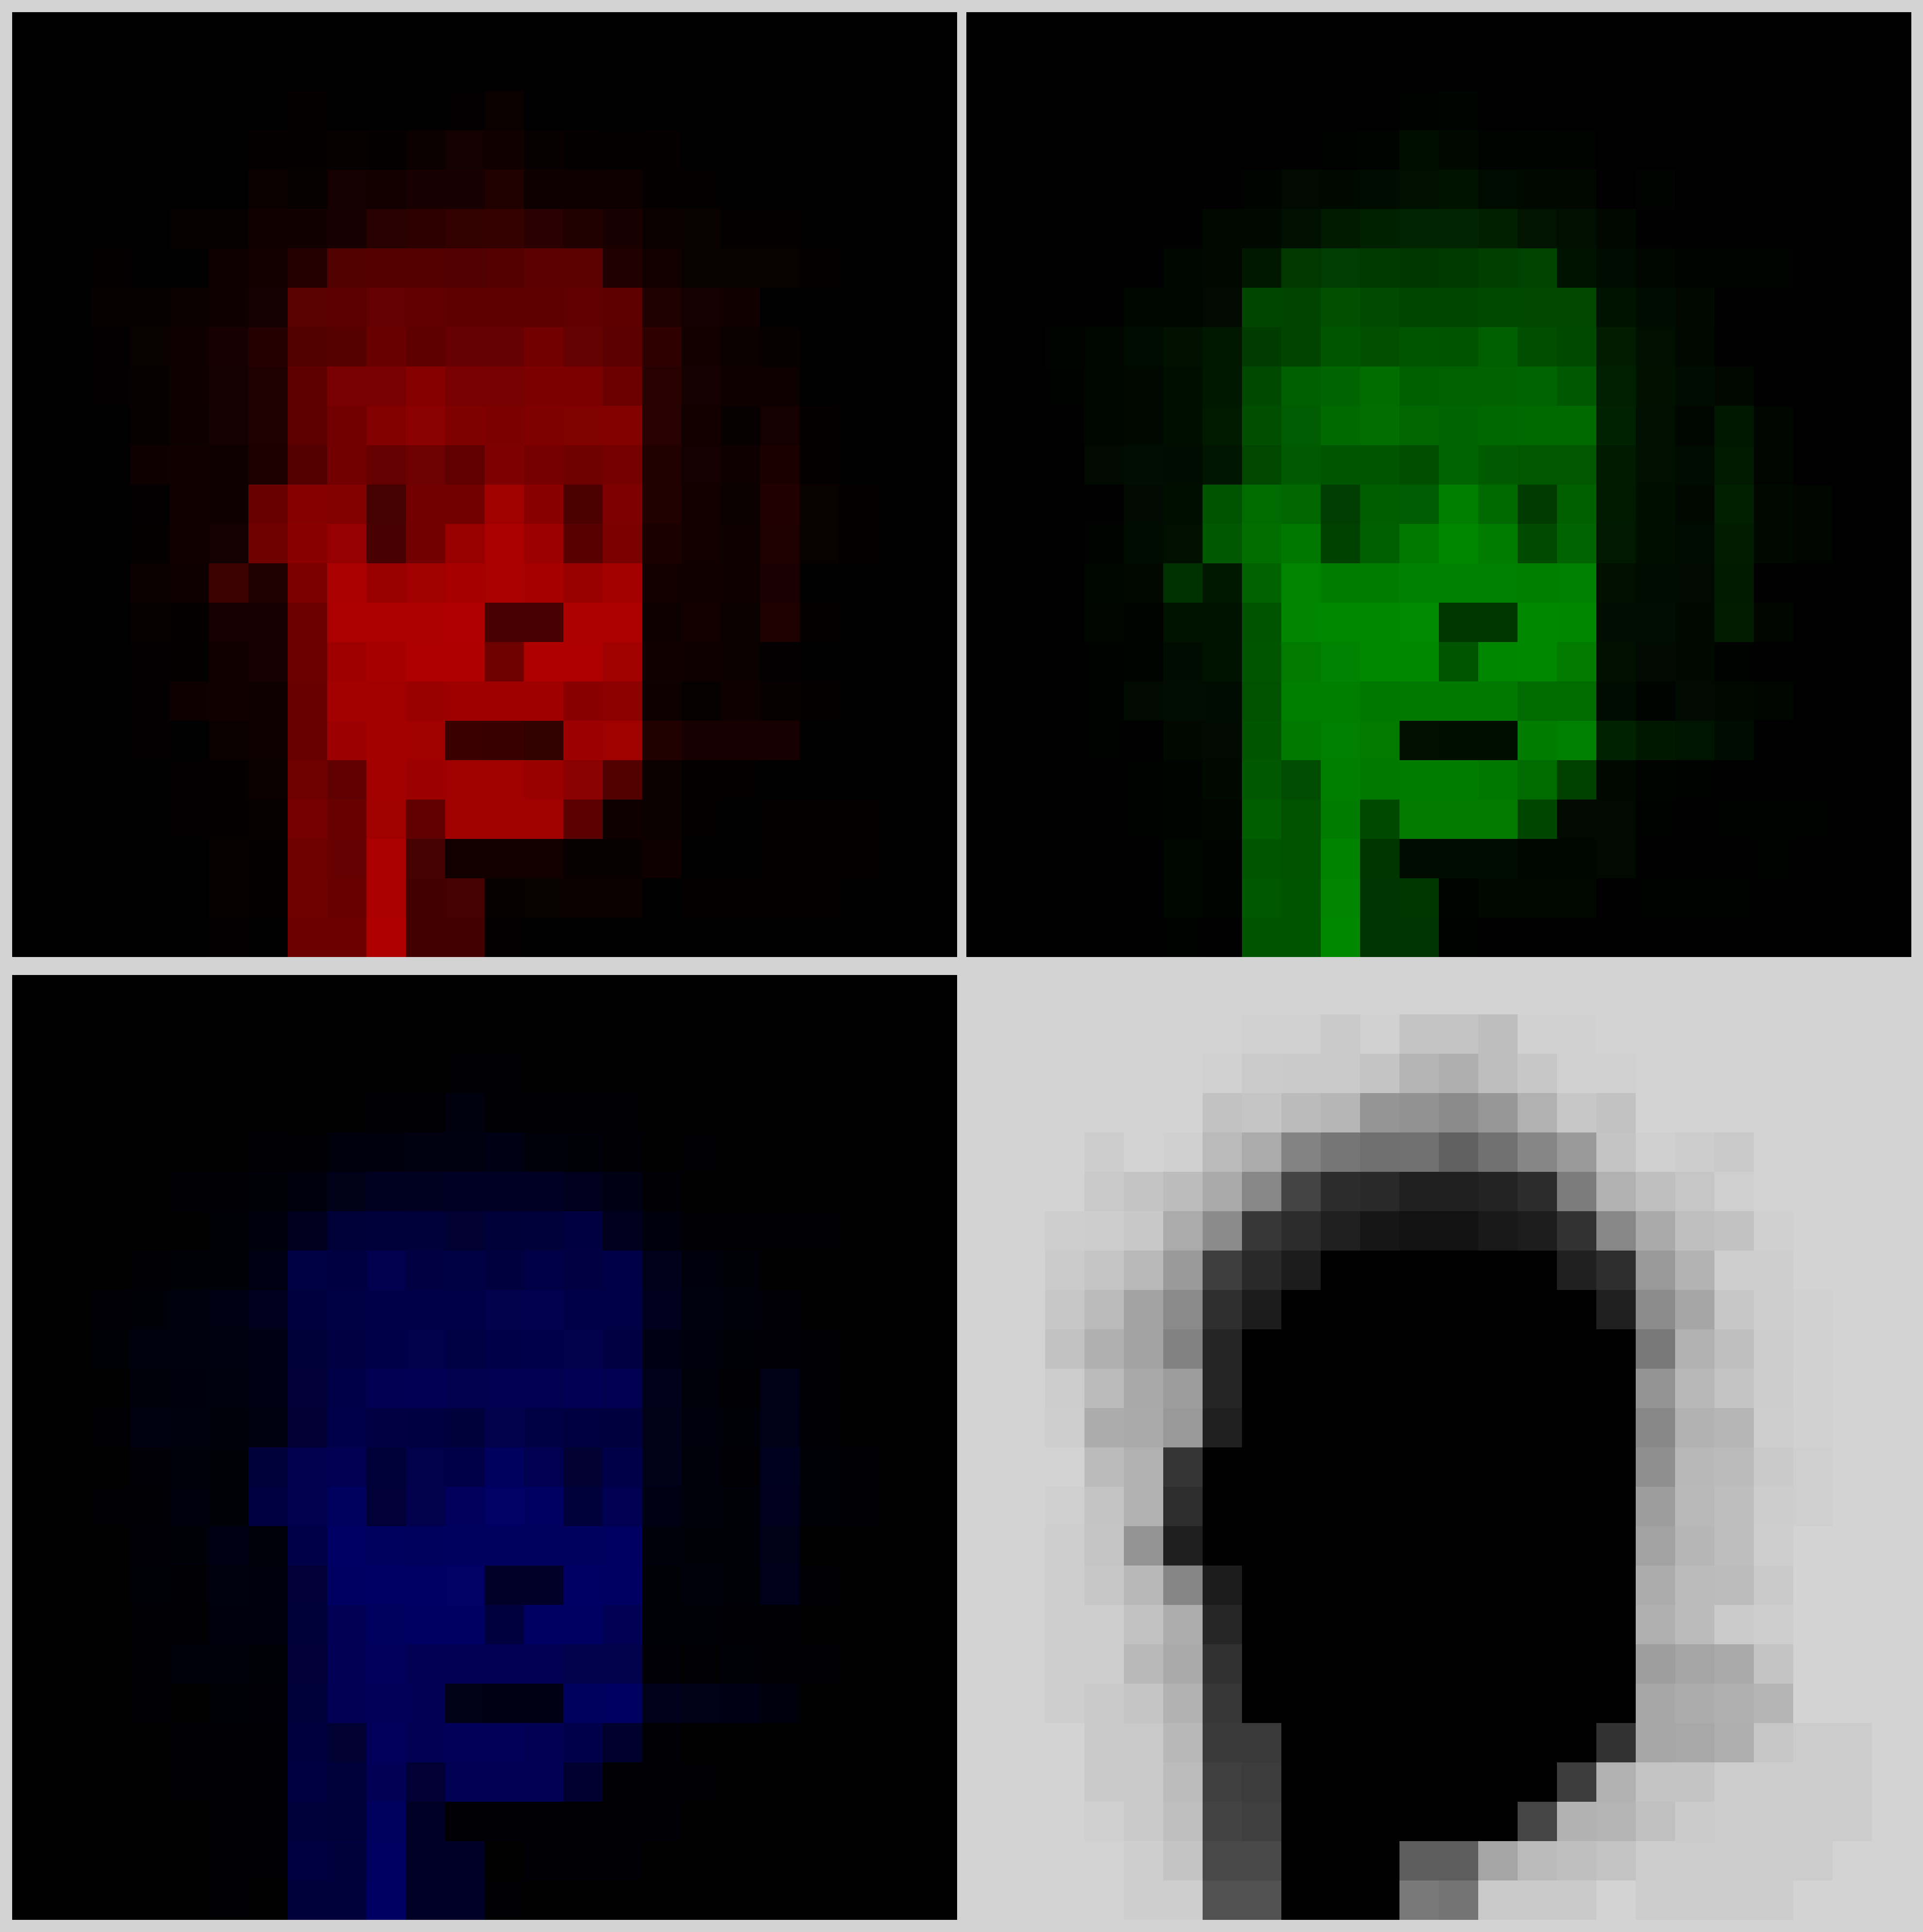

In [16]:
def mean_chanels():
    # Load the relevant data
    face_data = np.load('mean_face.npz')
    mean_face = face_data['mean_face']
    assert(mean_face.shape == (24, 24, 4))
    # mean_face = np.reshape(mean_face, (24, 24, 4, 1))
    
    # Array containing the four faces that are to be plotted
    faces = np.zeros(shape=(24, 24, 4, 4))

    
    #################################################### 
    #       Isolate the chanels

    # Red
    red_face = np.copy(mean_face)
    red_face[:,:,[1, 2]] = 0
    faces[:,:,:, 0] = red_face[:,:,:]
    
    # Green
    green_face = np.copy(mean_face)
    green_face[:,:,[0, 2]] = 0
    faces[:,:,:, 1] = green_face[:,:,:]
    

    # Blue
    blue_face = np.copy(mean_face)
    blue_face[:,:,[0, 1]] = 0
    faces[:,:,:, 2] = blue_face[:,:,:]
    
    # Want all the color channels to have full opacity
    faces[:, :, 3, [0, 1, 2]] = 1

    # Opacity
    opacity_face = np.copy(mean_face)
    opacity_face[:,:,[0, 1, 2]] = 0
    faces[:,:,:, 3] = opacity_face[:,:,:]

    ####################################################    
    

    # Plot all four singular chanels
    plotimgs(faces, 2)

    ##########################################################
    #   Plot a single face
    # plt.imshow(faces[:, :, :, 0])
    # plt.axis('off')
    # plt.show()
    ##########################################################
    
    
mean_chanels()

In [17]:
def split_and_reshape(faces, N):
    '''
    Splitting the faces into RGB- and opacity-channel, and reshaping the faces

    Input:
        faces: array
        N: number of faces
    
    Output:
        faces_rgb: array, the RBG-channel
        faces_opacity: array, the opacity-channel
        faces_reshaped: array, the reshaped faces-array
    '''
    # Split the images into opacity and rgb channels
    faces_opacity = faces[:,:,3,:]
    faces_rgb = faces[:,:,:3,:]
    shape = faces_rgb.shape

    # Clever reshape "trick". This is the matrix we will apply the NMF to
    faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)

    return faces_rgb, faces_opacity, faces_reshaped

## 2c

In [1]:
def plot_W_columns(W, d_val):
    '''
    Plot the columns of the W-matrix. This will reveal the important features of the faces.

    Input:
        W: array, the W-matrix
        d_val: int, the number of columns in the W-matrix
    '''
    # Reshaping the W-matrix
    W = np.reshape(W, (24, 24, 3, d_val))
    assert (W.shape == (24, 24, 3, d_val))

    # Plotting the columns of W 
    plotimgs(W, nplot = 8, rescale = False, filename = None)

In [3]:
def calculate_and_plot_features():
    '''
    Calculating and plotting the features of the previously generated faces. 
    '''
    # Importing the faces-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']


    d_val = 64 # the number of columns in the W-matrix
    N = 500 # the number of faces imported

    # Splittiing the faces into different channels and reshaping
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    # Calculating the NMF
    W, H = NMF(faces_reshaped, d_val)

    # Plotting the columns
    plot_W_columns(W, d_val)

# calculate_and_plot_features()

## 2d

In [4]:
def get_faces_with_opacity(reconstructed_faces, faces, faces_rgb, faces_opacity):
    '''
    Calculating the reconstructed faces with the correct opacity

    Input:
        reconstructed_faces: array, the WH-matrix
        faces: array, the faces-matrix A
        faces_rgb: array, the RGB-channels of faces
        faces_opacity: array, the opacity-channel of faces
    
    Output: 
        faces_with_opacity: array, the reconstructed faces with the correct opacity
    '''
    faces_with_opacity = np.zeros(faces.shape)
    faces_with_opacity[:, :, :3, :] = reconstructed_faces.reshape(faces_rgb.shape)
    faces_with_opacity[:, :, 3, :] = faces_opacity
    return faces_with_opacity

In [5]:
def plot_reconstructions():
    '''
    Calculating and plotting the reconstructions WH of the faces-matrix

    '''
    
    # Importing the faces-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']
    
    d_val = 64 # the number of columns in the W-matrix
    N = 500 # the number of faces imported

    # Splittiing the faces into different channels and reshaping
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    # Calculating the NMF
    W, H = NMF(faces_reshaped, d_val)
    
    # Calculating the reconstructed faces with the correct opacity
    faces_with_opacity = get_faces_with_opacity(np.dot(W, H), faces, faces_rgb, faces_opacity)

    # Plotting the reconstructions
    plotimgs(faces_with_opacity, nplot = 8, rescale = False, filename = None)
    
#plot_reconstructions()

## 2e og 2f

In [22]:
def calculate_norms(faces_reshaped, original_faces_reshaped, d_vals):
    '''
    Calculate the norms related to the NMF-function. The function will both calculate the norms for every iteration of the NMF-function and the final norm after the NMF has run.

    Input:
        faces_reshaped: array, the matrix containg the data for the reconstructed faces.
        original_faces_reshaped: array, the original reshaped faces. This is for when we later want to calculate the norms of the noisy faces.
        d_val: int, the number of columns in the W-matrix.
        
    Output:
        iteration_norms_arr: array, the calculated iterations norms
        final_norms_arr: array, the calculated final norms
    '''
    
    N = 500 # The number of faces

    # Lists that will be filled with the calculated norms 
    iteration_norms_arr = []
    final_norms_arr = []
    
    # Loop that will calculate the norms
    for i in range(len(d_vals)):

        # Calculating the NMF and storing the norms for every iteration
        W, H, n = NMF(faces_reshaped, d_vals[i], delta = 1e-9, maxiter = 1000, seed = 0, store_norms = True)
        
        # Adding the iteration norms to the list
        iteration_norms_arr.append(n)

        # Calculating the final norm, and adding it to the list
        final_norms_arr.append(np.linalg.norm(original_faces_reshaped - np.dot(W, H), 'fro'))

    # Returning the lists containing the norms
    return iteration_norms_arr, final_norms_arr

In [23]:
def plot_norms(norms_arr, iteration_norms, d_vals_arr, labels_arr, title, x_label, y_label, plot_for_iterations = False):
    '''
    Plotting the two different arrays of calculated norms.

    Input:
        norms_arr: array, array containing the norms calculated after the NMF had run
        teration_norms: array, array containing the norms calculated during the NMF-algoritm
        d_vals_arr: array, array containing the number of columns in the W-matrises
        labels_arr: array, array containing the labels for the norms that will be plottet
        title: string, the title of the plot
        x_label: string, the label of the plots x-axis
        y_label: string, the label of the plots y-axis
        plot_for_iterations: bool, if the iteration norms or the final norms are going to be plotted
    '''
    
    # Checking wether the iteration norms are going to be plotted
    if plot_for_iterations == True:
        x = np.arange(0, len(iteration_norms[0]), 1) # Array with the steps from the first to the last iteration. This will be our x-axis
        # Looping through every iteration norms and plotting 
        for i in range(len(iteration_norms)):
            plt.plot(x, iteration_norms[i], label = labels_arr[i])
    else:
        # Plotting the final norms
        for i in range(len(norms_arr)):
            plt.plot(d_vals_arr[i], norms_arr[i], label = labels_arr[i])

    plt.title(title) # Adding title
    plt.xlabel(x_label) # Adding x-axis
    plt.ylabel(y_label) # Adding y-axis
    plt.legend() # Adding legend
    plt.show() # Showing the plot

In [7]:
# Dette er koden til 2e
def iteration_norms():
    '''
    Calculating and plotting the norms for every iteration of the NMF-function
    '''

    # Importing the faces-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    N = 500 # the number of faces imported

    # Splitting the faces into different channels and reshaping
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    d_vals = [16, 32, 64] # The different numbers of columns in the W-matrix

    # Calculating the iteration-norms
    iteration_norms = calculate_norms(faces_reshaped, faces_reshaped, d_vals)[0]

    # Plotting the norms
    plot_norms([], iteration_norms, [d_vals], ['d = 16', 'd = 32', 'd = 64'], "Norms as function of iterations", r'$k$', r'$\vert\vert{A-W_{k} H_{k}}\vert\vert_{F}$', plot_for_iterations = True)

# iteration_norms()  

In [8]:
# Dette er koden til 2f
def final_norms():
    '''
    Calculating and plotting the final norms for every iteration of the NMF-function
    '''
    # Importing the faces-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    N = 500 # The number of faces imported

    # Splitting the faces into different channels and reshaping 
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    d_vals = [16, 64, 128, 256] # The different numbers of columns in the W-matrix

    # Calculating the norms
    norms = calculate_norms(faces_reshaped, faces_reshaped, d_vals)[1]

    # Plotting the norms
    plot_norms([norms], [], [d_vals], [''], r'Norms as function of $d$', r'$d$', r'$\vert\vert{A-WH}\vert\vert_{F}$')

# final_norms()

Shape of W: (24, 24, 3, 128) 
Shape of H: (128, 500)
d = 128


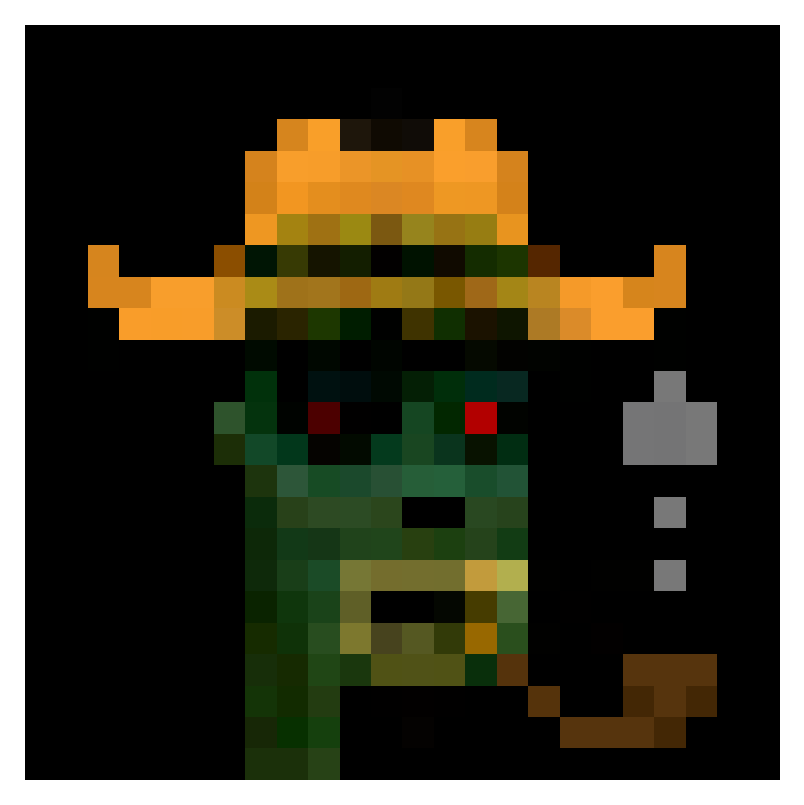

In [26]:
def custom_face():

    # Unpack the relevant data 
    matrix_data = np.load('W_and_H_128.npz')
    W, H = matrix_data['W_calculated'], matrix_data['H_calculated']


    print(f'Shape of W: {np.shape(W)} \nShape of H: {np.shape(H)}')
    
    # plotimgs(np.dot(W, H), rescale=True)

    # calculate_reconstructions(W, H, plot_original_faces=True)

    # Find dim(W)
    d = np.shape(W)[-1]
    print(f'd = {d}')

    # Create the cunstom face vector
    custom_face = np.zeros(shape=(d, 1))
    custom_face[45] = 3.5   # Cowboy hat
    custom_face[66] = 2     # Zombie
    custom_face[84] = 0.7   # Pipe


    # Plot the basis of W
    # plotimgs(W, nplot=12, rescale = True, filename='base_vectors')

    ##########################################################
    #   Plot a single face
    plt.imshow(np.dot(W, custom_face)[:, :, :, 0])
    plt.axis('off')
    # plt.savefig('custom_face')
    plt.plot()
    ##########################################################
    

custom_face()

# Task 3

Det som er skrevet under er kopiert fra utdelt kode

## 3a

In [27]:
# Legge til støy
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = imgs_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces

In [9]:
def add_noise_to_images():
    '''
    Funtion for adding noise to faces/images
    '''

    N = 500 # The number of faces imported

    # Importing the faces-data
    faces_data = np.load('faces.npz')
    faces = faces_data['faces_500']

    # Splitting the faces into different channels and reshaping 
    faces_rgb, faces_opacity, faces_reshaped = split_and_reshape(faces, N)

    # Adding the noise onto the faces
    noisy_faces = add_noise(faces_reshaped)

    # Saving the faces
    np.savez(
        'noisy_faces',
        faces = faces, 
        faces_rgb = faces_rgb, 
        faces_opacity = faces_opacity,
        faces_reshaped = faces_reshaped,
        noisy_faces = noisy_faces
    )
    
    # Calculate the error of the noisy images
    noise_residual = np.linalg.norm(noisy_faces - faces_reshaped, 'fro')
    print(f"Norm: {round(noise_residual, 2)}")

    # For plotting noisy images we add the opacity
    noisy_faces_with_opacity = np.zeros(faces.shape)
    noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
    noisy_faces_with_opacity[:,:,3,:] = faces_opacity
    plotimgs(noisy_faces_with_opacity)
    
# add_noise_to_images()

## 3b

In [10]:
def remove_nosie():
    '''
    Using the NMF-function to remove noise from the noisy-images
    '''

    # Importing data
    noisy_faces_data = np.load('noisy_faces.npz')
    noisy_faces = noisy_faces_data['noisy_faces']
    faces = noisy_faces_data['faces']
    faces_rgb = noisy_faces_data['faces_rgb']
    faces_opacity = noisy_faces_data['faces_opacity']

    d_val = 64 # the number of columns in the W-matrix
    N = 500 # the number of faces imported

    # Calculating the NMF
    W, H = NMF(noisy_faces, d_val)

    # Plotting the columns of W
    plot_W_columns(W, d_val)
    
    # Generating the array for the reconstructions with opacity
    noisy_faces_with_opacity = get_faces_with_opacity(np.dot(W, H), faces, faces_rgb, faces_opacity)

    # Plotting the reconstructions
    plotimgs(noisy_faces_with_opacity, nplot = 8, rescale = False, filename = None)

#remove_nosie()

## 3c

In [11]:
def calculate_norms_for_noisy_faces():
    '''
    Calculating the norms for the noisy and noiseless faces
    '''

    # Importing the faces-data
    noisy_faces_data = np.load('noisy_faces.npz')
    noisy_faces = noisy_faces_data['noisy_faces']
    faces_reshaped = noisy_faces_data['faces_reshaped']

    
    d_vals = [8,16,32,64, 128, 256, 512,1024] # The different numbers of columns in the W-matrix

    # Calculating the norms    
    norms_without_noise = calculate_norms(faces_reshaped, faces_reshaped, d_vals)[1] # Noiseless norms
    norms_with_noise = calculate_norms(noisy_faces, faces_reshaped, d_vals)[1] # Noise norms

    
    # Saving the data
    np.savez(
        'noisy_norms',
        d_vals = d_vals,
        norms_without_noise = norms_without_noise,
        norms_with_noise = norms_with_noise
    )
#calculate_norms_for_noisy_faces()

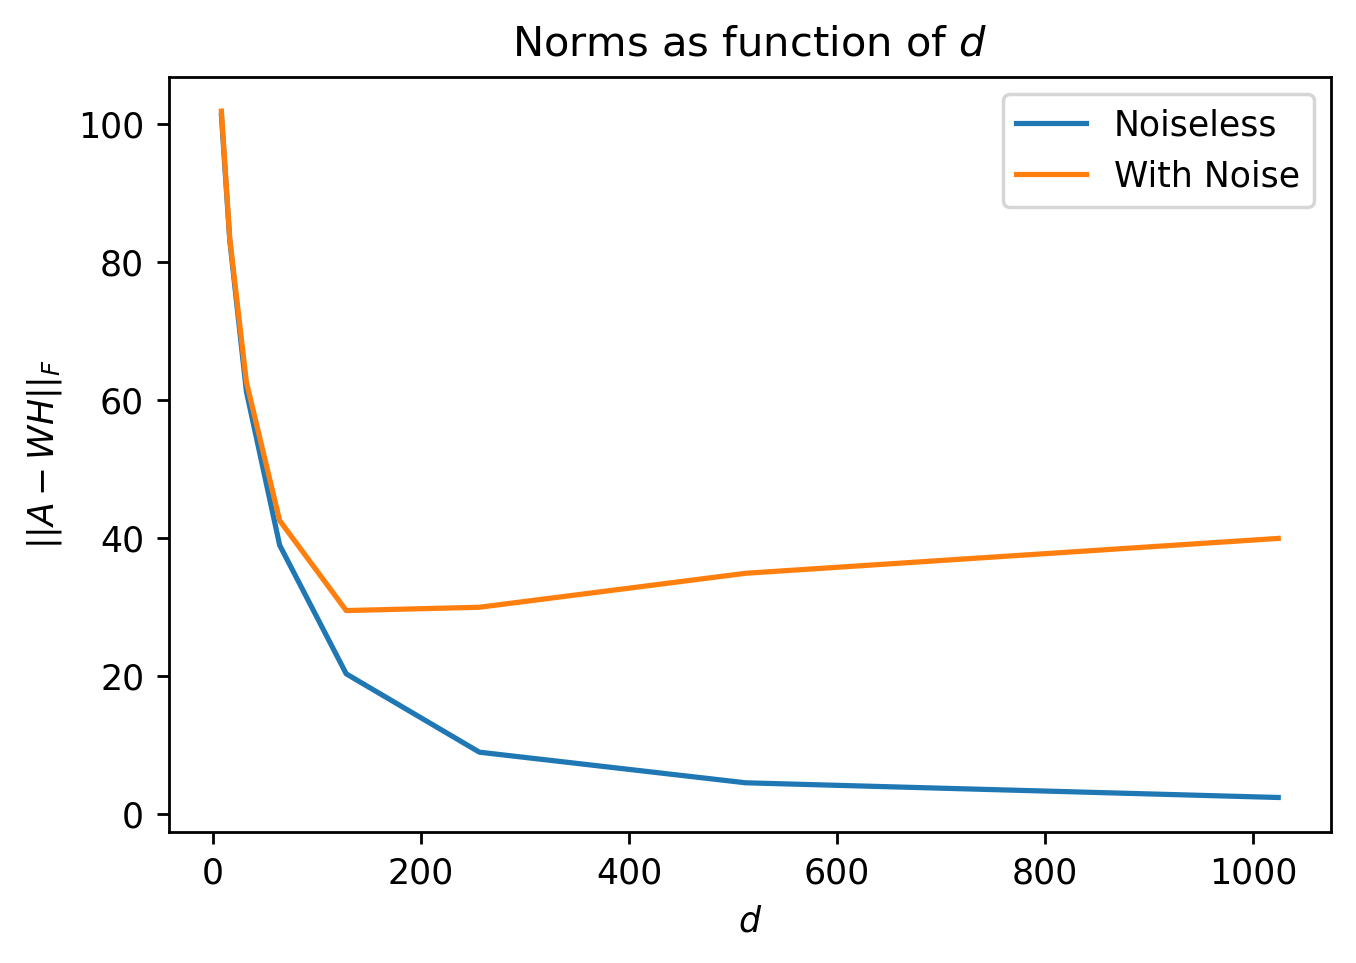

In [31]:
def plot_norms_for_noisy_faces():
    '''
    Plotting the norms for the noisy and noiseless faces
    '''

    # Importing the data
    noisy_faces_data = np.load('noisy_norms.npz')
    norms_without_noise = noisy_faces_data['norms_without_noise']
    norms_with_noise = noisy_faces_data['norms_with_noise']
    d_vals = noisy_faces_data['d_vals']

    # Plotting the two norms in the same figure
    plot_norms([norms_without_noise, norms_with_noise], [], [d_vals, d_vals], ['Noiseless', 'With Noise'], r'Norms as function of $d$', r'$d$', r'$\vert\vert{A-WH}\vert\vert_{F}$')

# plot_norms_for_noisy_faces()